# Testy realizacji zapytań dla ograniczonej pamięci operacyjnej

Testy zostały zrealizowane za pomoca skryptu bash oraz python do wywoływania zapytań do bazy danych PostGIS. Rezultaty zostały zapisane w pliku `stress_test_results_postgis.csv`.

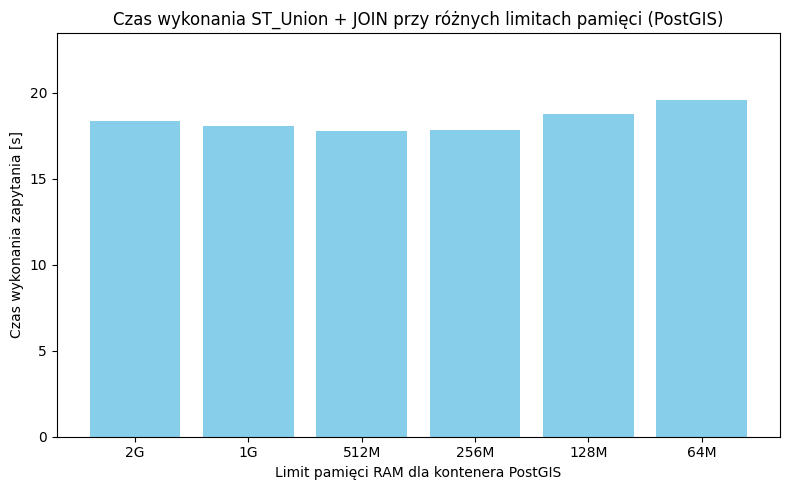

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("stress_test_results.csv")

order = ["2G", "1G", "512M", "256M", "128M", "64M"]
df["mem_limit"] = pd.Categorical(df["mem_limit"], categories=order, ordered=True)

df_ok = df[df["exec_time"].notnull()]

plt.figure(figsize=(8, 5))
plt.bar(df_ok["mem_limit"], df_ok["exec_time"], color="skyblue")
plt.xlabel("Limit pamięci RAM dla kontenera PostGIS")
plt.ylabel("Czas wykonania zapytania [s]")
plt.title("Czas wykonania ST_Union + JOIN przy różnych limitach pamięci (PostGIS)")
plt.ylim(0, max(df_ok["exec_time"])*1.2)

for idx, row in df.iterrows():
    if pd.isnull(row["exec_time"]):
        plt.text(row["mem_limit"], 1, "Błąd\n(OOM)", ha='center', color='red', fontsize=10)

plt.tight_layout()
plt.show()

**Wnioski**

Dla limitów pamięci 128M i 64M kontener Docker z PostGIS-em został automatycznie zatrzymany przez system (Out Of Memory),
co skutkuje błędem połączenia lub nagłym przerwaniem działania serwera bazy danych.

Czasy wykonania zapytań przy niższych limitach pamięci (np. 512M, 256M) mogą być nawet krótsze niż przy większych limitach,
ponieważ dane mogły zostać zbuforowane przez system operacyjny lub bazę danych (cache dysku, cache zapytań).
Przy powtarzanych zapytaniach PostGIS może korzystać z już wczytanych do pamięci stron danych, co przyspiesza wykonanie,
dopóki nie zabraknie pamięci na nowe operacje.

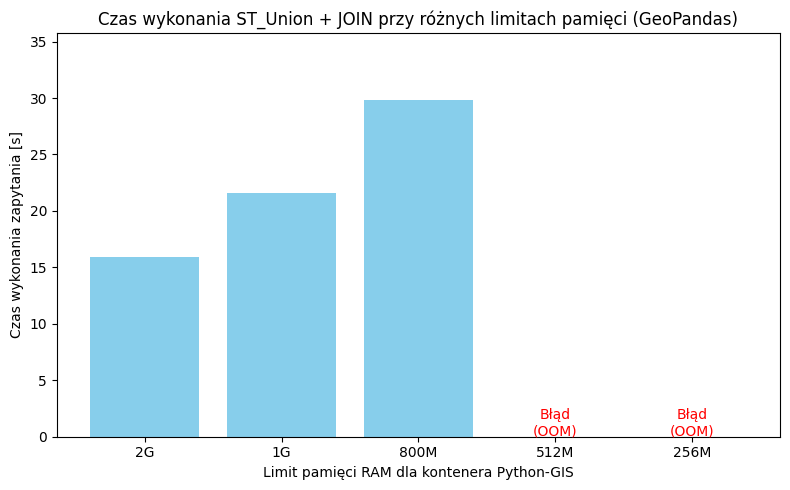

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

order = ["2G", "1G", "800M", "512M", "256M"]
df = pd.read_csv("stress_test_results_geopandas.csv")
df["mem_limit"] = pd.Categorical(df["mem_limit"], categories=order, ordered=True)

df = df.set_index("mem_limit").reindex(order).reset_index()

plt.figure(figsize=(8, 5))
plt.bar(df["mem_limit"], df["exec_time"].fillna(0), color="skyblue")
plt.xlabel("Limit pamięci RAM dla kontenera Python-GIS")
plt.ylabel("Czas wykonania zapytania [s]")
plt.title("Czas wykonania ST_Union + JOIN przy różnych limitach pamięci (GeoPandas)")
plt.ylim(0, max(df["exec_time"].dropna())*1.2 if df["exec_time"].notnull().any() else 1)

for idx, row in df.iterrows():
    if pd.isnull(row["exec_time"]):
        plt.text(row["mem_limit"], 0.1, "Błąd\n(OOM)", ha='center', color='red', fontsize=10)

plt.tight_layout()
plt.show()